In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

Loading the data from Antoine

In [5]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [6]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just Group 4 group

In [8]:
group4_list = set()

for column in data.columns:
    if "Group 4" in column: 
        group4_list = group4_list.union(set(data[column].replace({"":None}).dropna()))   

print(group4_list)

{'EN2', 'UNC5D', 'KDM7A', 'POU2F1', 'ZNF35', 'AKT', 'TBR1', 'KDM5B', 'MLL3', 'UNCX', 'KDM6A', 'SNCAIP', 'CHD7', 'EZH2', 'ARID5B', 'LMX1A', 'OTX2', 'STAT5A', 'KDM4C', 'ZIC4', 'BARHL1', 'SIX2', 'LHX5', 'CUX2', 'HLF', 'LHX1', 'ZIC1', 'SIX6', 'ZMYM3', 'MYCN', 'EOMES', 'KDM1A', 'ZNF513', 'EOMES/TBR2', 'LHX2', 'KDM5A', 'KHDR2', 'ERK', 'KDM3A'}


# Creating a Network starting from All Omnipath interactions

In [9]:
group4_net = Network(group4_list, resources = resources.interactions)

Error: node ZNF35 is not present in the resources database
Error: node UNCX is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node BARHL1 is not present in the resources database
Error: node SIX2 is not present in the resources database
Error: node LHX5 is not present in the resources database
Error: node ZMYM3 is not present in the resources database
Error: node ZNF513 is not present in the resources database
Error: node EOMES/TBR2 is not present in the resources database
Error: node KHDR2 is not present in the resources database


In [10]:
group4_net.add_node("TBR2")

Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [11]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,EN2,P19622,NaN
1,UNC5D,Q6UXZ4,NaN
2,KDM7A,Q6ZMT4,NaN
3,POU2F1,P14859,NaN
4,AKT1,P31749,NaN
5,TBR1,Q16650,NaN
6,KDM5B,Q9UGL1,NaN
7,KMT2C,Q8NEZ4,NaN
8,KDM6A,O15550,NaN
9,SNCAIP,Q9Y6H5,NaN


In [12]:
group4_net.complete_connection(maxlen=6, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True, consensus=False)

In [13]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,EN2,P19622,NaN
1,UNC5D,Q6UXZ4,NaN
2,KDM7A,Q6ZMT4,NaN
3,POU2F1,P14859,NaN
4,AKT1,P31749,NaN
...,...,...,...
88,MSX1,P28360,NaN
89,CDKN1A,P38936,NaN
90,CDK1,P06493,NaN
91,CD274,Q9NZQ7,NaN


In [14]:
group4_net.edges

,source,target,Type,Effect,References
0,P31749,Q13131,None,inhibition,16340011; 27784766
1,Q13131,Q16576,None,stimulation,28143904
2,Q16576,SIGNOR-C448,None,form complex,14609955
3,SIGNOR-C448,P19622,None,stimulation,14609955
4,Q13131,P14859,None,inhibition,1684878; 9368058
...,...,...,...,...,...
257,P06493,Q96EB6,None,stimulation,19107194
258,Q8NEZ4,Q9NZQ7,None,stimulation,30385408
259,Q9NZQ7,Q15116,None,stimulation,11015443
260,Q15116,SIGNOR-PF24,None,inhibition,16227604


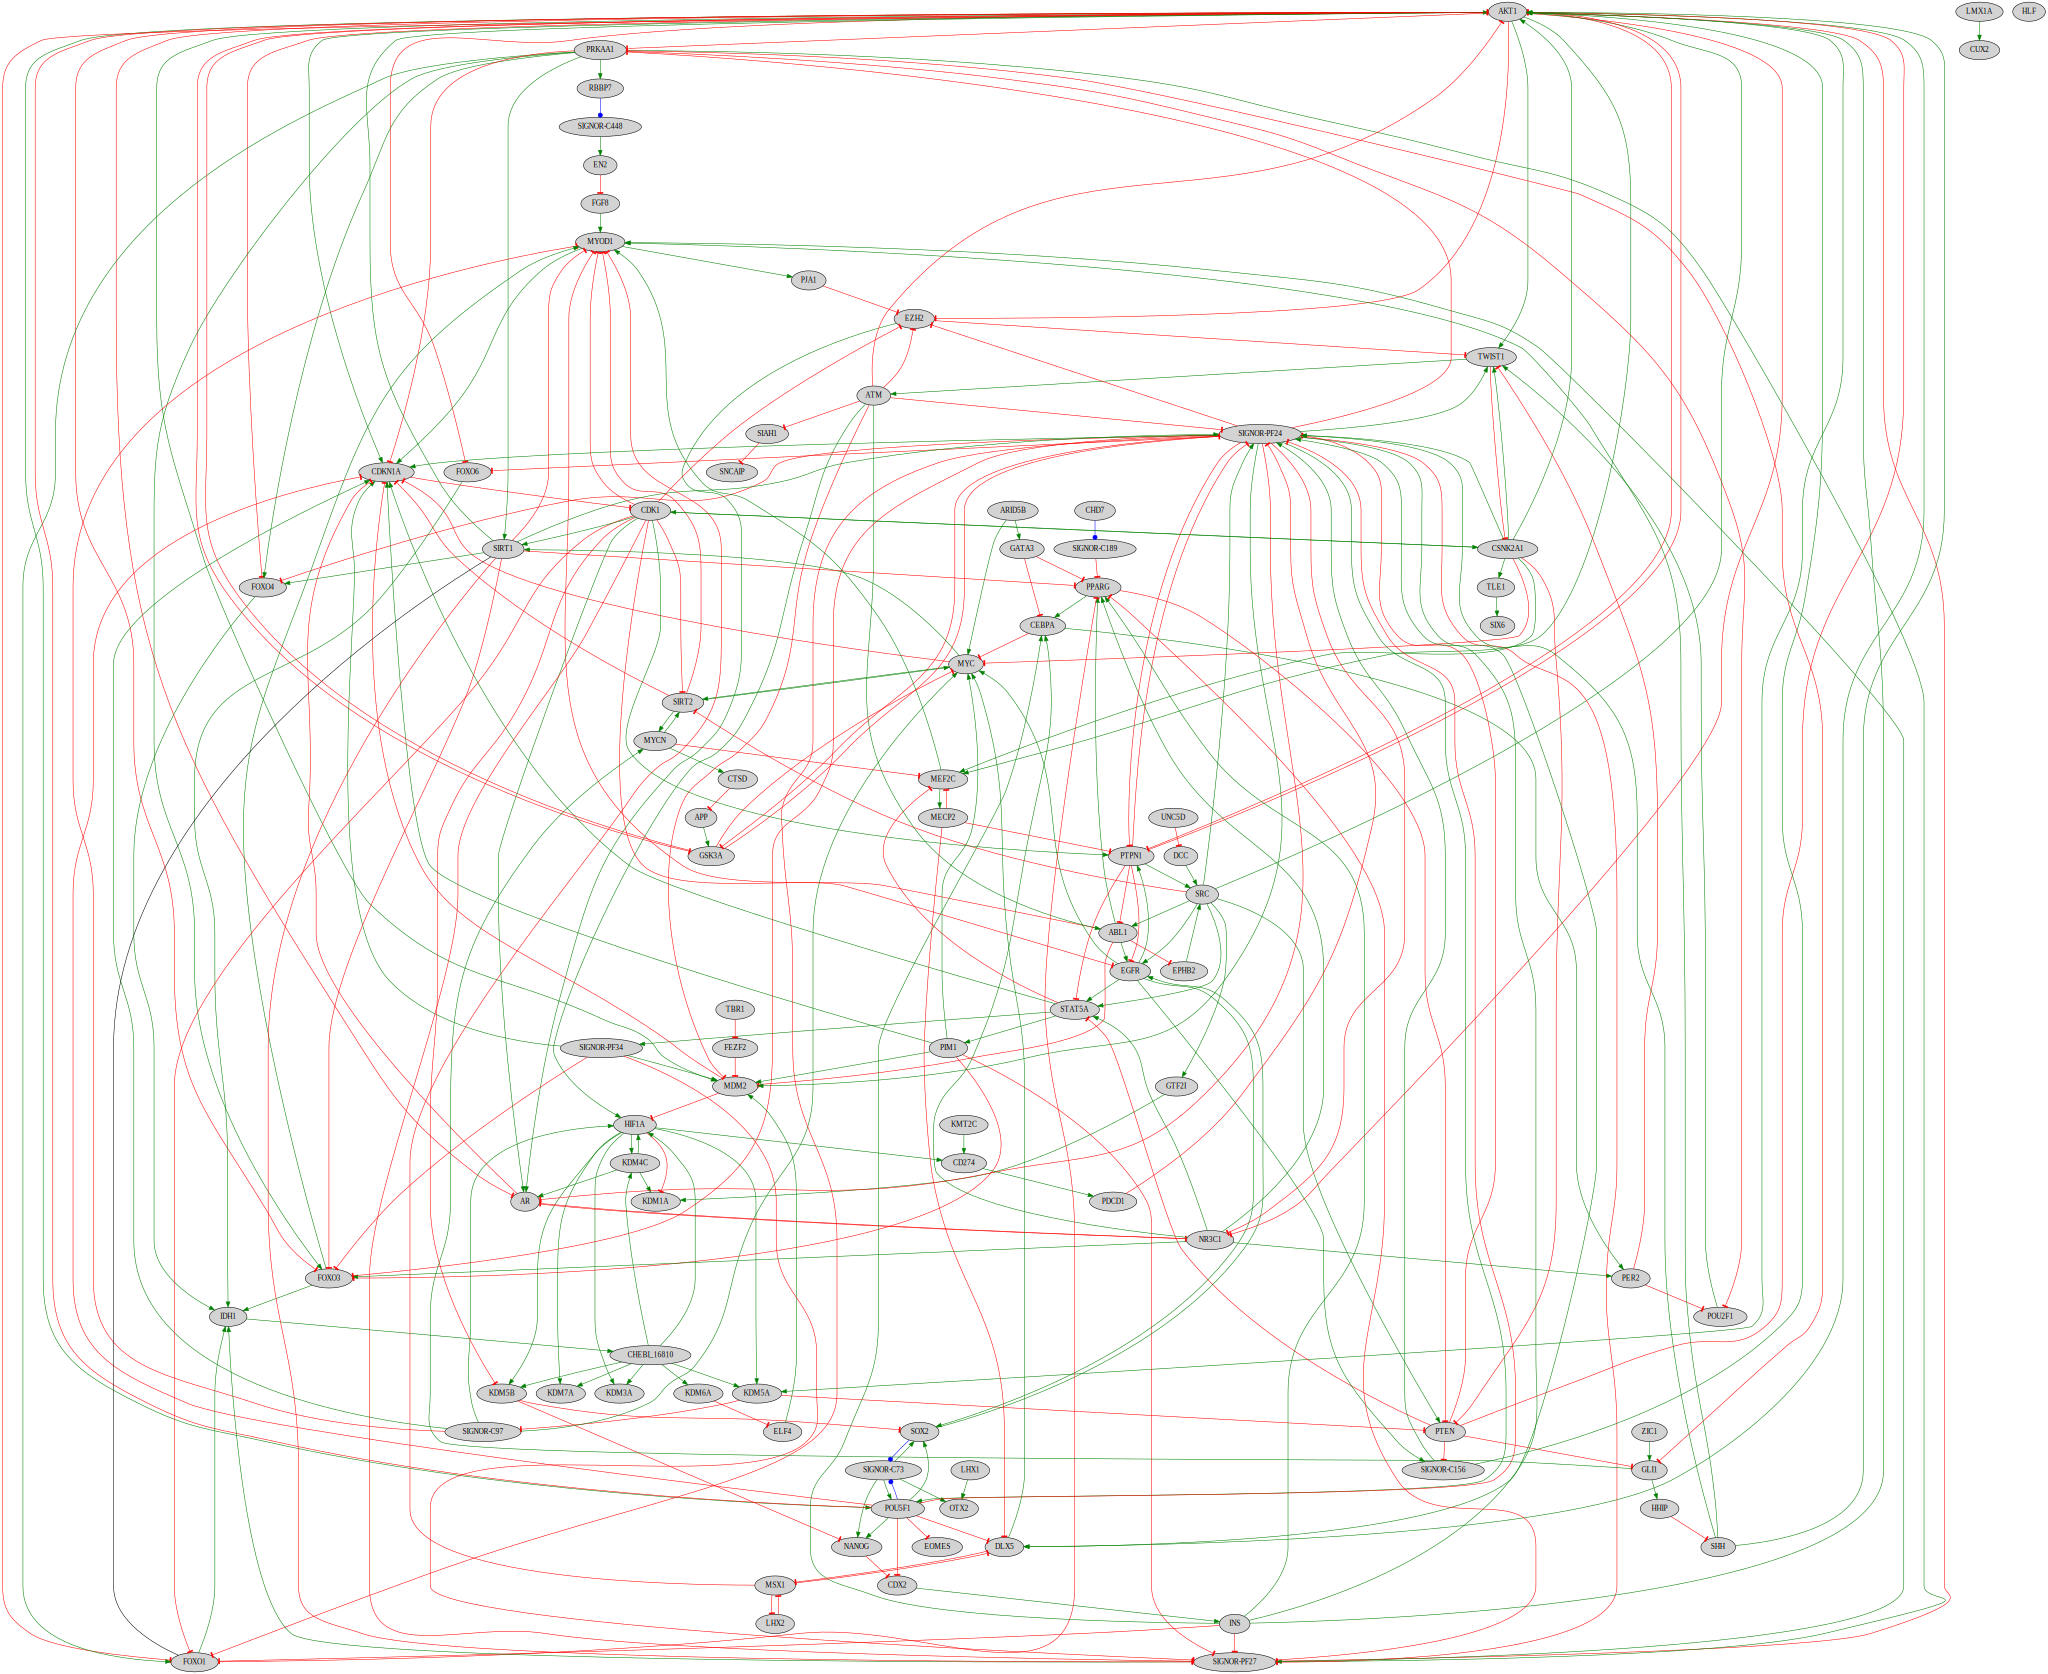

In [15]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect')
output = figures_folder + "Group4/Group4_signor"
group4_visualizer.render(output_file=output)

# Exporting Network in sif file

In [16]:
from neko._outputs.exports import Exports

In [17]:
for node in group4_net.nodes["Uniprot"]:
    if group4_net.edges[group4_net.edges["source"].isin([node])].empty and group4_net.edges[group4_net.edges["target"].isin([node])].empty:
        print(group4_net.nodes[group4_net.nodes["Uniprot"] == node])

   Genesymbol Uniprot Type
18        HLF  Q16534  NaN


In [18]:
group4_net.remove_node("HLF")

In [19]:
group4_net.remove_node("LMX1A")

In [20]:
group4_net.remove_node("CUX2")

In [21]:
export = Exports(group4_net)

In [22]:
export.export_sif(sif_output + "Group4_signor.sif")